In [32]:
#Implementing regression using deep neural network.
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [33]:
# Load the Boston Housing dataset
boston = fetch_california_housing()
X, y = boston.data, boston.target

In [34]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Build the deep neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with no activation for regression

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# Train the model
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
465/465 [==============================] - 3s 6ms/step - loss: 1.0246 - val_loss: 0.4441
Epoch 2/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3901 - val_loss: 0.4121
Epoch 3/100
465/465 [==============================] - 2s 4ms/step - loss: 0.4213 - val_loss: 0.3935
Epoch 4/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3479 - val_loss: 0.3748
Epoch 5/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3370 - val_loss: 0.3614
Epoch 6/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3269 - val_loss: 0.3533
Epoch 7/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3408 - val_loss: 0.3387
Epoch 8/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3182 - val_loss: 0.3459
Epoch 9/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3783 - val_loss: 0.3553
Epoch 10/100
465/465 [==============================] - 2s 4ms/step - loss: 0.3291 - val_lo

In [39]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.2752


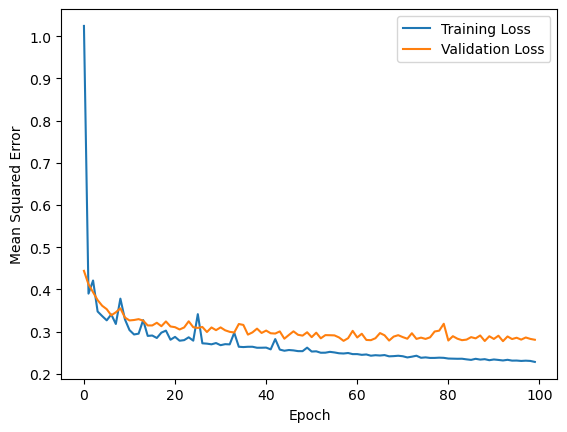

In [40]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [41]:
# Make predictions on new data
X_new = np.array(X_test[:3])  # Use the first 3 samples from the test set
predictions = model.predict(X_new)

1/1 [==============================] - 0s 93ms/step


In [42]:
# Print the predictions
print("Predictions:")
for i in range(len(predictions)):
    print(f"Sample {i + 1}: Actual Value: {y_test[i]}, Predicted Value: {predictions[i][0]:.2f}")

Predictions:
Sample 1: Actual Value: 0.477, Predicted Value: 0.53
Sample 2: Actual Value: 0.458, Predicted Value: 1.27
Sample 3: Actual Value: 5.00001, Predicted Value: 4.99
